# Project description

**Market Research Of Establishments in Los Angeles**

Link to presentation: https://ufile.io/0tchjgmu


**Project description**

We’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so we decide to try to attract investors. They’re interested in the current market conditions. I was asked to prepare some market research. 
**Description of the data**

object_name — establishment name
chain — chain establishment (TRUE/FALSE)
object_type — establishment type
address — address
number — number of seats

#### Table of Contents
#### Step 1.
- [Open the data file and read the general information.](#Open.)

#### Step 2. Data analysis
- [Investigating the proportions of the various types of establishments.](#Open.)
- [Investigating the proportions of chain and nonchain establishments.](#Open.)
- [Which type of establishment is typically a chain?](#Open.)
- [What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?](#Open.)
- [Puting the data on street names from the address column in a separate column.?](#Open.)
- [Ploting a graph of the top ten streets by number of restaurants.](#Open.)
- [Finding the number of streets that only have one restaurant.](#Open.)
- [For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?](#Open.)
- [Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.](#Open.)


#### Step 3. Preparing a presentation
- [Presentation of your research to share with investors.](#Open.)

# Step 1. Download the data and prepare it for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec


data = pd.read_csv('/datasets/rest_data_us.csv') 
print(data.info())
print(data.head())
print(data.tail())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None
      id          object_name                    address  chain object_type  \
0  11786  HABITAT COFFEE SHOP     3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY # 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD # 253  False   Fast Food   
3  11789    TRINITI ECHO PARK         1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN         2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3      22  
4      20  
         id      object_name                      address  chain object_type

•	There aren't missing rows in datasets, except for the column 'chain', in which 3 values are missing.3 missing values will not affect the test results in any way and can be droped.

•	The column "chain" has boolean values that can be changed to int type for for the convenience of calculations.

•	No negative or other obscure meanings.

•   There is a large difference between min and max revenue values in "number" column. It means the data of the column has a  right-skewed distribution. 



In [2]:
#cheking for duplicates
data.duplicated().sum()


0

By using the duplicated() and sum() methods I found out that there aren't duplicated rows in datasets.

In [3]:
#checking for unique values of each column 

print(data.chain.value_counts())
print(data.object_type.value_counts())



False    5972
True     3676
Name: chain, dtype: int64
Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64


# Step 2. Data analysis


# Investigate the proportions of the various types of establishments. Plot a graph.


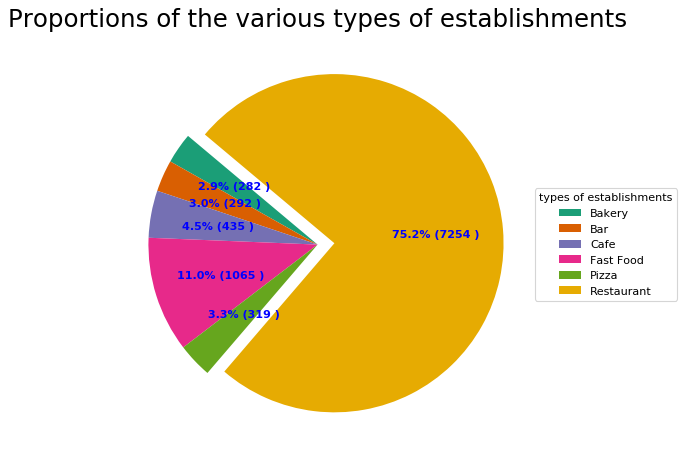

In [4]:


# preparing data
df = data.groupby('object_type').size().reset_index(name='counts')
# drawing plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)
data_new = df['counts']
categories = df['object_type']
explode = [0,0,0,0,0,0.1]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data_new, 
                                  autopct=lambda pct: func(pct, data_new),
                                  textprops=dict(color="b"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,explode=explode)

                            

# Decoration
ax.legend(wedges, categories, title="types of establishments", loc="center left", bbox_to_anchor=(1, 0, 10, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Proportions of the various types of establishments",fontsize=22)
plt.show()


According to our pie chat, the largest part of all establishments are restaurants(75%). The remaining 25% is shared by: bakery,bar,cafe,fast food and pizza. 

Most (11%) of 25% went to a Pizza. The smalleset part of pie went to Bakery.

# Investigate the proportions of chain and nonchain establishments. Plot a graph.

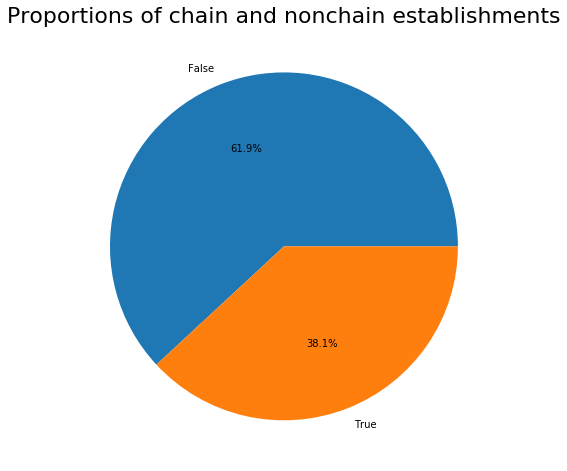

In [5]:
# preparing data
df_chain = data.groupby('chain').size()

# drawing plot
df_chain.plot(kind='pie', subplots=True, figsize=(8, 8),autopct='%1.1f%%')

# decoration
plt.title("Proportions of chain and nonchain establishments",fontsize=22)
plt.setp(autotexts, size=10, weight=700)
plt.ylabel("")
plt.show()



According to our pie chart , most of the establishments are not chains.

# Which type of establishment is typically a chain?


Text(0.5, 1, 'Which type of establishment is typically a chain?')

posx and posy should be finite values
posx and posy should be finite values


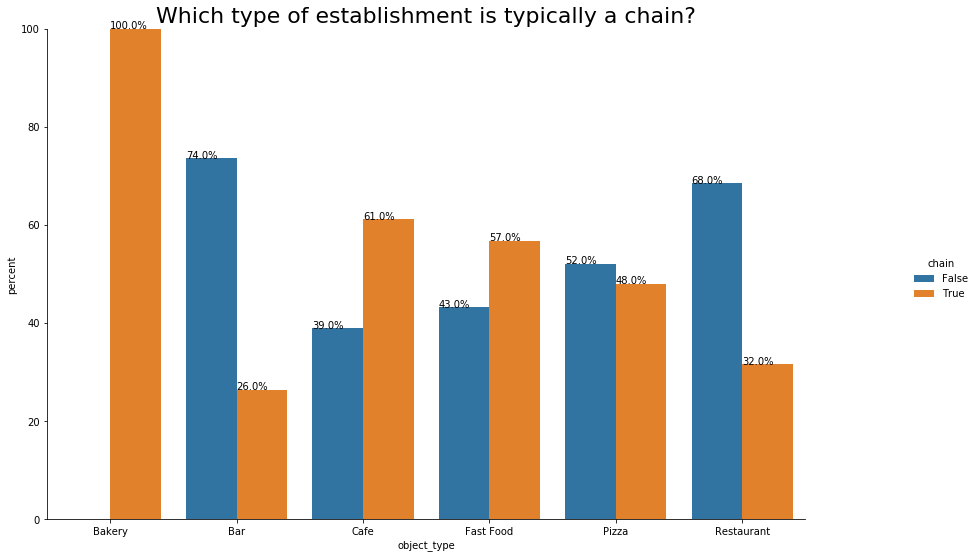

In [6]:
# preparing data

x,y = 'object_type', 'chain'

chain_chat = data.groupby(x)[y].value_counts(normalize=True)
chain_chat = chain_chat.mul(100)
chain_chat  = chain_chat .rename('percent').reset_index()

# drawing plot
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=chain_chat)


# decoration + adding percents

g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round()) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
    
g.fig.set_figwidth(15)
g.fig.set_figheight(8)    

plt.title("Which type of establishment is typically a chain?", fontsize=22)    





According to our graph more than 50 percent of cafes, bakeries and fast-food establishments are chains:
100% of bakery are chains,
61% of cafeterias are chains,
57% of fast food restaurants are chains.


**That is, these establishments are more likely to become a chain and grow.**

Surprisingly, only 32% of restaurants are chains.


# What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

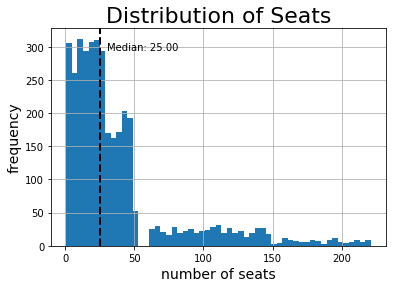

In [7]:
# preparing data

data = data[data['chain'].notna()] #dropping missing rows
data["chain"] = data["chain"].astype(int) #changing bolean values to 1/0 values.

#preparing data
seats= data.query('chain == 1') #filtering data for establishments with chains

#applying histogramm of seats distribution 
seats.hist('number', bins = 'auto', range=(1,221)) 

#decorations + adding median value 
plt.rcParams["figure.figsize"] = [16,9]
plt.axvline(seats['number'].median(), color='k', linestyle='dashed', linewidth=2)
plt.title('Distribution of Seats', fontsize=22)
plt.xlabel('number of seats', fontsize=14)
plt.ylabel('frequency', fontsize=14)
min_ylim, max_ylim = plt.ylim()
plt.text(seats['number'].median()*1.2, max_ylim*0.9, 'Median: {:.2f}'.format(seats['number'].median()))
plt.show()





According to our graph: 50% of establishments have 25 chairs. Also, the histogram shows that chains lean towards having many establishments with small number of seats (1 to 50 seats).

# Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

Text(0.5, 1.0, 'The median number of seats for each type of restaurant')

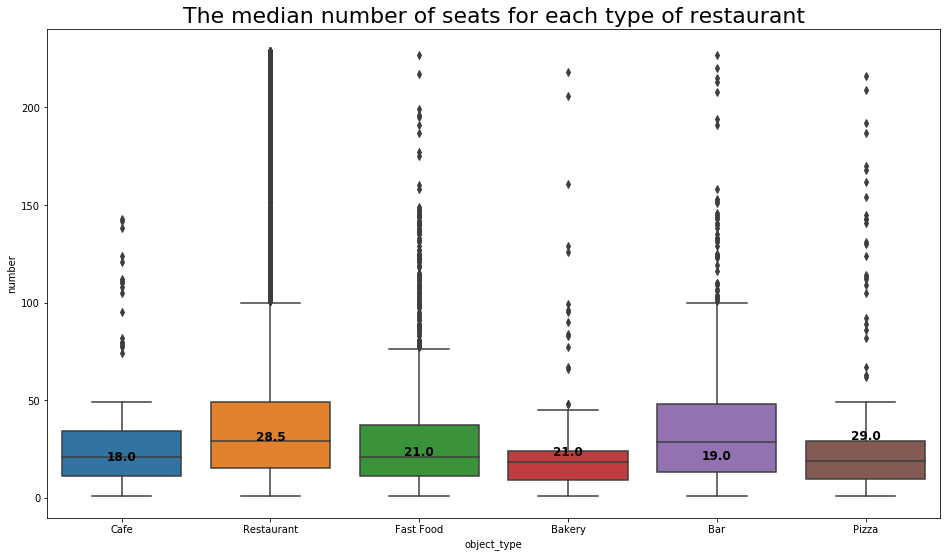

In [8]:

#drowing boxplot
box_plot = sns.boxplot(x=data.object_type, y=data.number, data=data)


#decorations + adding median value 
medians = data.groupby(['object_type'])['number'].median()
vertical_offset = data['number'].median() * 0.03 

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='large',color='black',weight='bold')
    
    
plt.title("The median number of seats for each type of restaurant", fontsize=22)    



Most of the seats in pizzerias and restaurants(about 28 chairs in the establishment) and the least number of seats in cafes and bars(about 18 chairseats in the establishment).
Due to the fact that the distribution of seats have un-normal distribution(right-skewed distribution) I used the median value instead of the average value.

# Put the data on street names from the address column in a separate column.

In [9]:
data['street_name'] = (data['address'].replace('(^[0-9]+)','',regex=True).replace('[0-9 #]+$','',regex=True))
data['street_name'].head(10)

0          N EAGLE ROCK BLVD
1                  WORLD WAY
2             HOLLYWOOD BLVD
3              W SUNSET BLVD
4              ECHO PARK AVE
5              NATIONAL BLVD
6                  WORLD WAY
7               W 6TH ST STE
8     N SAN FERNANDO RD UNIT
9            N CAHUENGA BLVD
Name: street_name, dtype: object

# Plot a graph of the top ten streets by number of restaurants.

<Figure size 1280x800 with 0 Axes>

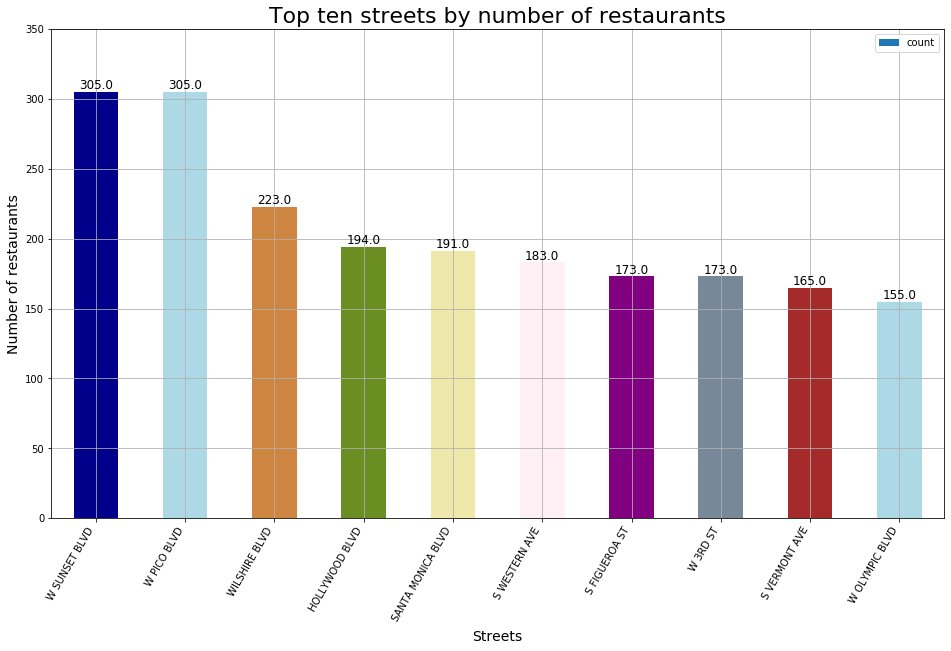

In [10]:
#preparing and sorting data
streets=data['street_name'].value_counts(sort=True).rename_axis('street').reset_index(name='count')

#taking 10 largest numbers 
top_ten_streets = streets.head(10)

#top_ten_streets.plot(x='street',y='count', kind='bar',grid=True ,title='Top ten streets by number of restaurants')

#plt.xlabel('number of restaurants', fontsize=14)
#plt.ylabel('top ten streets', fontsize=14)

import random 

n = top_ten_streets['street'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)


#ploting bars
plt.figure(figsize=(16,10), dpi= 80)
top_ten_streets.plot(x='street',y='count', kind='bar',grid=True ,title='Top ten streets by number of restaurants')
plt.bar(top_ten_streets['street'], top_ten_streets['count'], color=c, width=.5)
for i, val in enumerate(top_ten_streets['count'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# decoration
plt.gca().set_xticklabels(top_ten_streets['street'], rotation=60, horizontalalignment= 'right')
plt.title("Top ten streets by number of restaurants", fontsize=22)
plt.xlabel('Streets', fontsize=14)
plt.ylabel('Number of restaurants', fontsize=14)

plt.ylim(0, 350)
plt.show()




                             


According to our graph on the streets W SUNSET BLVD and W PICO BLVD there are most restaurants. I can assume that these streets are in the very center. The company should consider these streets when
deciding the location of the establishment. 

# Find the number of streets that only have one restaurant.


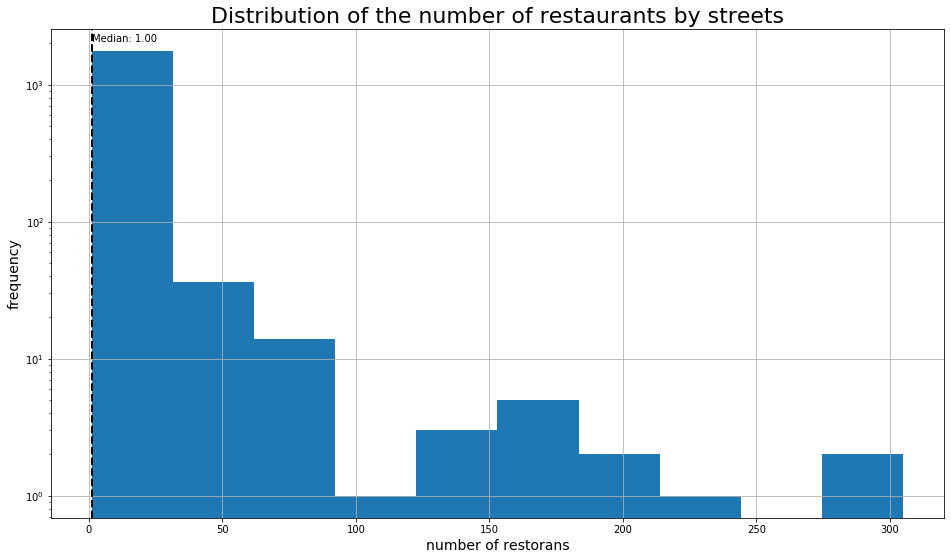

The total number of streets: 1832
The number of streets that only have one restaurant: 1213


In [11]:

#ploting histogram to check the distribution of the number of restaurants
streets.hist('count', log=True)

#decorating and adding median value:
plt.rcParams["figure.figsize"] = [16,9]
plt.axvline(streets['count'].median(), color='k', linestyle='dashed', linewidth=2)
plt.title('Distribution of the number of restaurants by streets', fontsize=22)
plt.xlabel('number of restorans', fontsize=14)
plt.ylabel('frequency', fontsize=14)
min_ylim, max_ylim = plt.ylim()
plt.text(streets['count'].median()*1.2, max_ylim*0.8, 'Median: {:.2f}'.format(streets['count'].median()))
plt.show()




print('The total number of streets:', len(streets))
print('The number of streets that only have one restaurant:', len(streets.query('count == 1')))


A significant part of the streets contains one restaurant(1213 from 1832 restorans) Most likely this is due to the fact that most of the streets are not located in the center -there are fewer tourists, and therefore there is no greater demand for ready-made food.I suppose that on the streets remote from the center, the restaurant business earns much worse, and therefore there are much fewer of them.

# For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

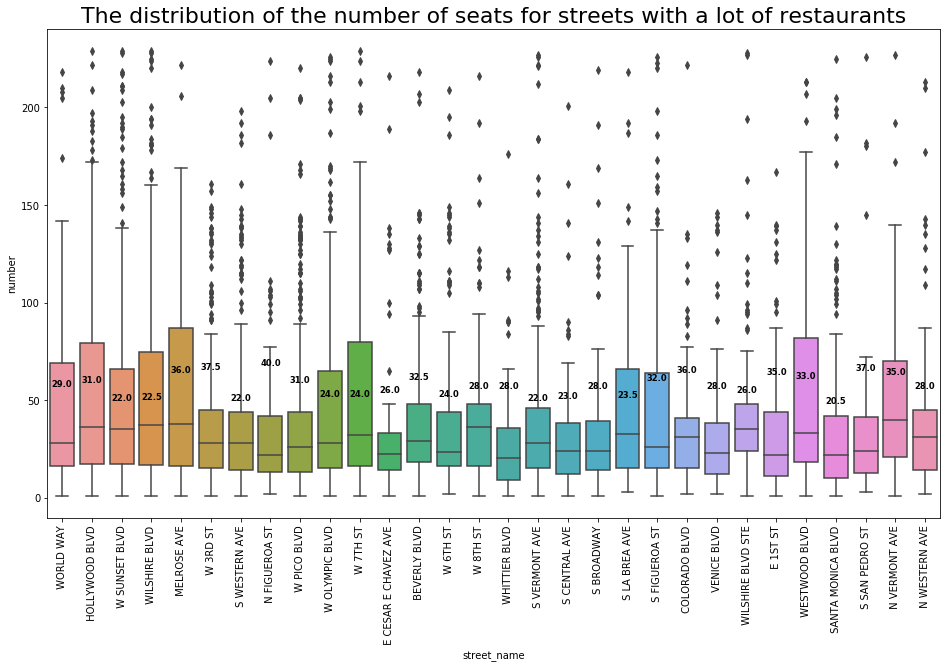

In [12]:




top_30_streets = streets.head(30)
top_30 = top_30_streets['street']
top_30_seats = data[data['street_name'].isin(top_30)]

#drowing boxplot
box_plot = sns.boxplot(x=top_30_seats.street_name, y=top_30_seats.number, data=top_30_seats)


#decorations + adding median value 
medians = top_30_seats.groupby(['street_name'])['number'].median()
vertical_offset = top_30_seats['number'].median() 

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='black',weight='bold')
    
plt.title("The distribution of the number of seats for streets with a lot of restaurants", fontsize=22)    
    

plt.xticks(rotation=90)



On average, there are 20 to 40 seats on streets with a large number of restaurants.

# Summary and suggestions:

- The largest part of all establishments are restaurants(75%). The remaining 25% is shared by: bakery,bar,cafe,fast food and pizza.

**It should be borne in mind that we will have strong competition when opening a restaurant.In this case, I would recommend considering establishments with less competition:bakery,bar,cafe,fast food and pizza.**


- More than 50% of cafes, bakeries and fast-food establishments are chains.About 50% of pizzerias become chains.Bars and restaurants are the least likely to become a chain.

**In this case, I would recommend opening an establishment where there is an equal chance of being or not being online. Thus, we are not limited to any decisions in the future.*According to our analysis, this establishment is pizzeria.**


- 50% of establishments have 25 chairs. Also, the histogram shows that chains lean towards having many establishments with small number of seats (1 to 50 seats). The average number of seats for a restaurant and pizzeria is 29.The average number of seats for a fast food and bakery is 21.The smallest number of seats is in cafe is 18. 

**In this case, I would recommend opening an establishment with the largest optimal number of places.We see that the pizzeria and restaurant can accommodate the largest number of seats.This means that there are more opportunities for earning.Plus, given the high competition from restaurants, in this case I would also recommend a pizzeria.**

- I recommend opening a restaurant on one of these streets:N EAGLE ROCK BLVD, WORLD WAY, HOLLYWOOD BLVD, W SUNSET BLVD , ECHO PARK AVE, NATIONAL BLVD , WORLD WAY , 6TH ST, SAN FERNANDO RD UNIT, N CAHUENGA BLVD.On the one hand, these are the streets with the largest number of restaurants, which means high competition. But on the other hand, these streets have the largest number of people and tourists. (I assume these streets are in the very center)


**To summarize, I would recommend opening a pizza on one of the central streets of Los Angeles, with 28 places, with little competition and with a 50% chance of opening a chain in the future, depending on the decision of the investors.**





# STEP 3

Presentation: https://ufile.io/0tchjgmu